In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [37]:
data=pd.read_csv('twogtowb.csv')
data.head()

,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Game,Released Year,Updated Year
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,True,0.0,USD,...,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,False,True,2020,2020
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,...,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,False,2020,2021
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58,True,0.0,USD,...,2019-08-09,2019-08-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,False,2019,2019
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,True,0.0,USD,...,2018-09-10,2018-10-13,Everyone,NaN,True,False,False,False,2018,2018
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,True,0.0,USD,...,2020-02-21,2018-11-12,Everyone,http://www.horodyski.com.pl,False,False,False,False,2020,2018


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241856 entries, 0 to 2241855
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Minimum Installs  float64
 6   Maximum Installs  int64  
 7   Free              bool   
 8   Price             float64
 9   Currency          object 
 10  Size              object 
 11  Minimum Android   object 
 12  Released          object 
 13  Last Updated      object 
 14  Content Rating    object 
 15  Privacy Policy    object 
 16  Ad Supported      bool   
 17  In App Purchases  bool   
 18  Editors Choice    bool   
 19  Game              bool   
 20  Released Year     int64  
 21  Updated Year      int64  
dtypes: bool(5), float64(4), int64(3), object(10)
memory usage: 301.5+ MB


In [39]:
data.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price,Released Year,Updated Year
count,2.241661e+06,2.241661e+06,2.241856e+06,2.241856e+06,2.241856e+06,2.241856e+06,2.241856e+06
mean,2.204500e+00,2.753653e+03,1.765894e+05,3.093151e+05,1.049057e-01,2.018169e+03,2.019454e+03
std,2.108367e+00,1.984769e+05,1.420053e+07,2.208545e+07,2.659010e+00,2.146136e+00,1.576730e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e+03,2.009000e+03
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.500000e+01,0.000000e+00,2.017000e+03,2.019000e+03
50%,3.000000e+00,6.000000e+00,5.000000e+02,7.040000e+02,0.000000e+00,2.019000e+03,2.020000e+03
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.401000e+03,0.000000e+00,2.020000e+03,2.021000e+03
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02,2.021000e+03,2.021000e+03


## 데이터의 추세 확인
- 최신에 가까워 질수록 출시된 어플이 많았다.
- 이에 반해 어플 한 개당 다운로드 횟수는 감소했다.
- 코로나 이후 외부 활동에 필요한 어플의 출시 횟수는 감소하고, 게임 어플등 집에서 할 수 있는 어플의 출시 횟수가 증가했다.
- 특정년도에 시장을 뒤집는 어플이 등장한다.

<BarContainer object of 12 artists>

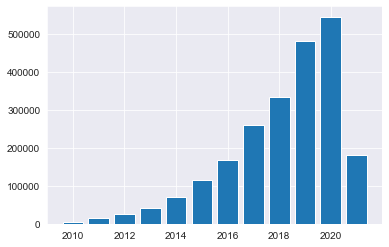

In [40]:
plt.bar(np.unique(data['Released Year'],return_counts=True)[0],np.unique(data['Released Year'],return_counts=True)[1])
# plt.show()

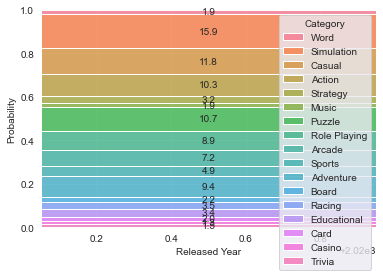

In [41]:
game_list=['action', 'adventure', 'arcade', 'board', 'card', 'casino', 'casual', 'educational', 'music', 'puzzle', 'racing', 'role playing',
           'simulation', 'sports', 'strategy', 'trivia', 'word']

tmp=data[(data['Game']==True)&(data['Released Year']>2019)&(data['Maximum Installs']>=100000)]
ax=sns.histplot(x='Released Year', data=tmp, bins=1, hue='Category',shrink=0.9,
             multiple='fill', stat='probability')

for p in ax.patches:
    left, bottom, width, height=p.get_bbox().bounds
    ax.annotate("%.1f"%(height*100), xy=(left+width/2, bottom+height/2),
                ha='center', va='center')

# tmp=data[data['Game']==True]
# sns.barplot(np.unique(tmp['Released Year'],return_counts=True)[0],np.unique(tmp['Released Year'],return_counts=True)[1], hue='game_list')
# plt.show()

In [42]:
#2021년 adventure 개수, 비율
tmp=data[data['Released Year']==2021]
print(len(tmp[(tmp['Game']==True)&(tmp['Category']=='Adventure')]))
print(len(tmp[(tmp['Game']==True)&(tmp['Category']=='Adventure')])/len(tmp[tmp['Game']==True]))

2469
0.06734493480988489


ValueError: num must be 1 <= num <= 42, not 43

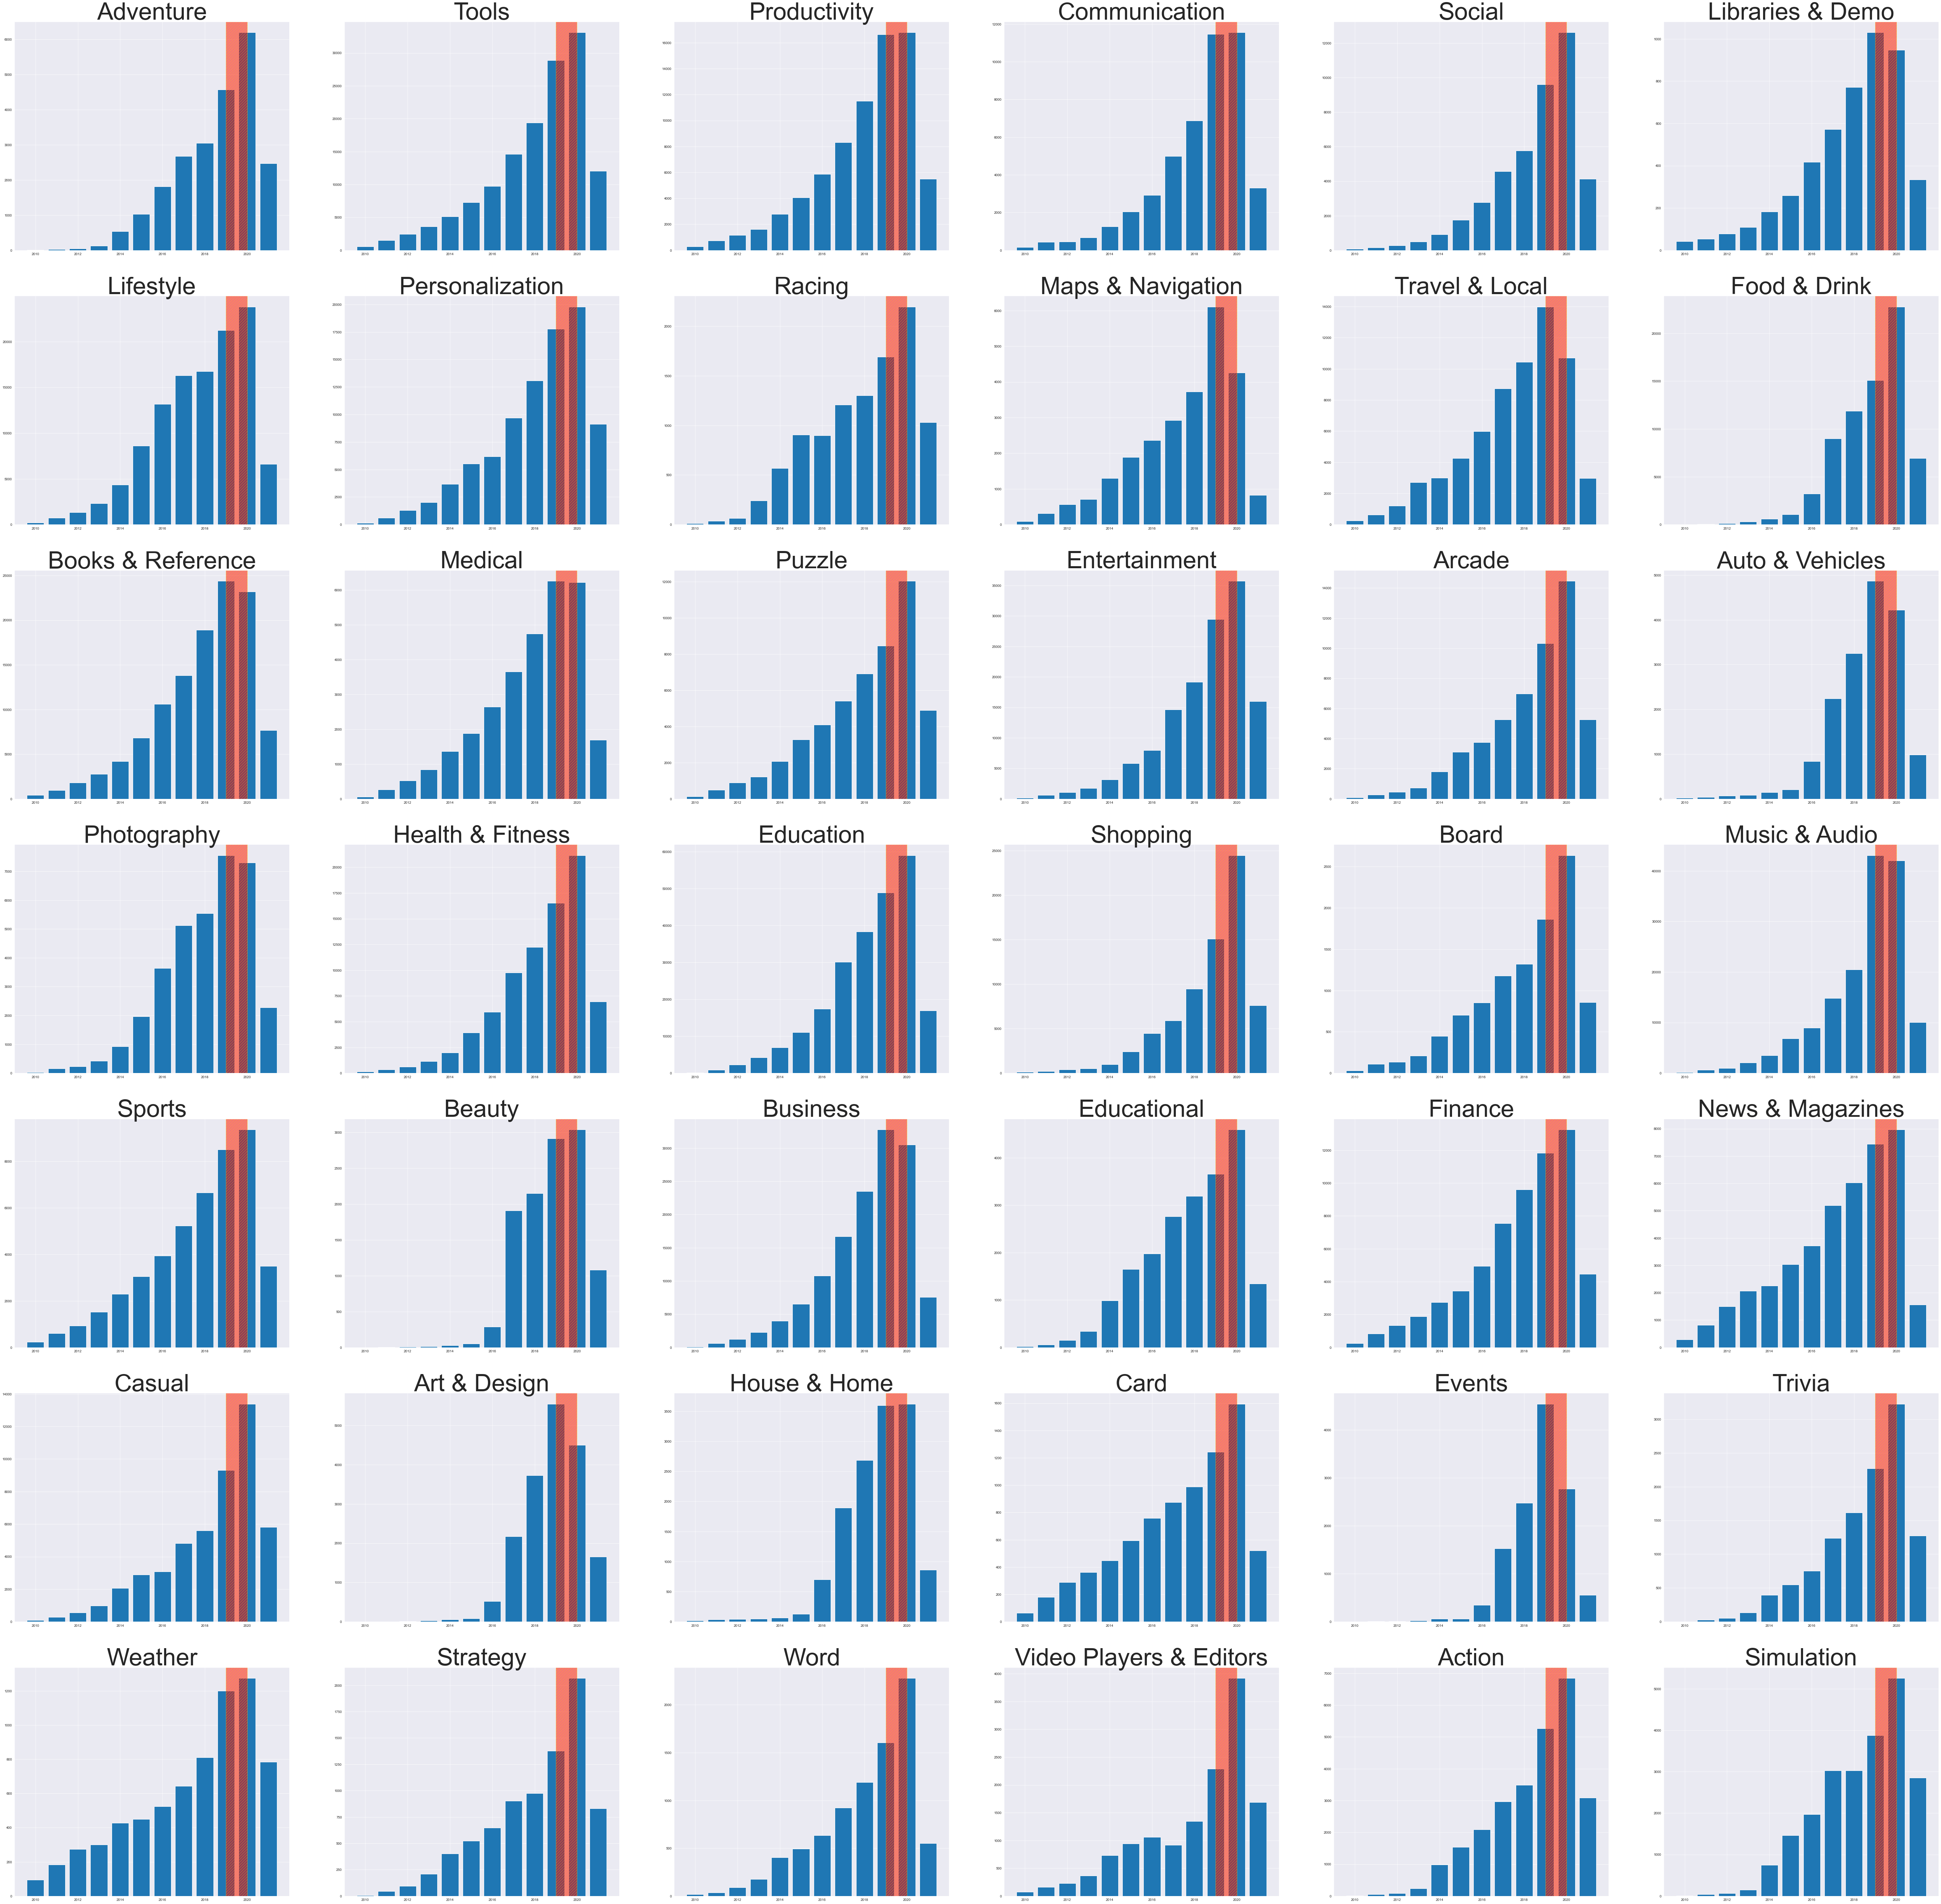

In [43]:
#game_list=['action', 'adventure', 'arcade', 'board', 'card', 'casino', 'casual', 'educational', 'music', 'puzzle', 'racing', 'role playing',
#           'simulation', 'sports', 'strategy', 'trivia', 'word']
#.str.lower()

COL = 7
ROW = int(len(data['Category'].unique()) / COL)
plt.figure(figsize=(100, 100))

for order, i in enumerate(data['Category'].unique()):
    #print('출시된 어플 개수')
    tmp=data[data['Category']==i]
    plt.subplot(COL, ROW, order+1)
    plt.bar(np.unique(tmp['Released Year'],return_counts=True)[0],np.unique(tmp['Released Year'],return_counts=True)[1])
    plt.axvspan(2019,2020, facecolor='red', edgecolor='gold', alpha=0.5, hatch='///')
    plt.title(str(i), fontdict = {'fontsize' : 70})

In [ ]:
COL = 7
ROW = int(len(data['Category'].unique()) / COL)
plt.figure(figsize=(100, 100))
for order, i in enumerate(data['Category'].unique()):
    #print('어플 한개당 설치 횟수')
    tmp=data[data['Category']==i]
    tmp2=tmp['Maximum Installs'].groupby(tmp['Released Year']).sum()/tmp['Released Year'].value_counts().sort_values()
    plt.subplot(COL, ROW, order+1)
    plt.bar(tmp2.index, tmp2)
    plt.title(str(i), fontdict = {'fontsize' : 70})

In [ ]:
tmp=data[data['Game']==False]
plt.bar(np.unique(tmp['Released Year'],return_counts=True)[0],np.unique(tmp['Released Year'],return_counts=True)[1])
plt.show()

In [ ]:
plt.bar(np.unique(data['Updated Year'],return_counts=True)[0],np.unique(data['Updated Year'],return_counts=True)[1])
plt.show()

In [ ]:
data['Minimum Installs'].groupby(data['Released Year']).sum().plot.bar()  #츨시연도를 그룹화하면 앱 출시 개수와 설치 개수의 차이가 적게 보인다
 #연도별 출시개수가 차이가 많은것에 비해 설치 개수의 차이가 적기 때문에 그룹별 점수 주기가 필요할 것 같다.

In [ ]:
data['Minimum Installs'].groupby(data['Updated Year']).sum().plot.bar()

## Max값 고려와 다운로드 횟수 시계열 특성 없애기
- 굳이??

In [ ]:
print('출시연도별 설치 횟수','\n', data['Minimum Installs'].groupby(data['Released Year']).sum().astype(np.int64))
print('연도별 앱 출시 횟수','\n',data['Released Year'].value_counts().sort_values())

print(data['Released Year'].value_counts().sort_values()/data['Maximum Installs'].groupby(data['Released Year']).sum())

In [ ]:
tmp=data['Maximum Installs'].groupby(data['Released Year']).sum()/data['Released Year'].value_counts().sort_values()
plt.bar(tmp.index, tmp)
plt.show() #연도별 설치 횟수/연도별 앱 출시 개수 -->출시된 기간이 예전일수록 앱 하나당 설치 횟수가 많다
#설치 횟수는 시간에 따라 누적된 데이터이기 때문에 고려해야할 부분이 생김

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x="Released Year", y="Maximum Installs", data=data) #극단적인 설치 횟수 값을 가진 앱이 있음

In [ ]:
data1=data[(data['Game']==False)&(data['Category']=='Auto & Vehicles')]
for i in range(2010,2022,1):
    display(data1[(data1['Released Year']==i)&(data1['Maximum Installs']>=data1[data1['Released Year']==i]['Minimum Installs'].max())])
#Google, Samsung등 스마트폰 유저의 기본 사용앱이 극단적으로 큰 데이터를 만들고 있음


In [ ]:
data1=data.copy()
data1.drop([data.groupby(['Released Year'])['Maximum Installs'].idxmax()]

In [ ]:
#max값 제거
data1=data.copy()
# data1[data1['Released Year']==2010]
# data1[(data1['Released Year']==2010)&(data1['Maximum Installs']>=data1['Maximum Installs'].quantile(0.99))].sort_values(by='Maximum Installs',ascending=False)

In [ ]:
data1=data1[data1['Maximum Installs']<=data1['Maximum Installs'].quantile(0.9)]

In [ ]:
data1['Level'] = data1.groupby(['Released Year'])['Maximum Installs'].transform(
                     lambda x: pd.qcut(x, 4, labels=range(1,5)))

In [ ]:
data1.info()

In [ ]:
sns.barplot(x='Level', y='Maximum Installs',hue='Released Year', data=data1)  #결과로 보기 어려움

In [ ]:
sns.barplot(x='Released Year', y='Maximum Installs',hue='Level', data=data1)

In [ ]:
plt.bar(np.unique(data1['Level'],return_counts=True)[0],np.unique(data1['Level'],return_counts=True)[1])
plt.show()

In [ ]:
data1['Released Month']=pd.to_datetime(data1['Released']).dt.month
data1['Released Month']

In [ ]:
sns.histplot(x='Released Month', data=data1, bins=12, hue='Level', kde=True)
sns.set(rc={'figure.figsize':(11,10)})

## 변수 살펴보기

In [44]:
data.head()

,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Game,Released Year,Updated Year
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,True,0.0,USD,...,2020-02-26,2020-02-26,Everyone,https://beniyizibyose.tk/projects/,False,False,False,True,2020,2020
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,...,2020-05-21,2021-05-06,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,False,2020,2021
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58,True,0.0,USD,...,2019-08-09,2019-08-19,Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,False,2019,2019
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,True,0.0,USD,...,2018-09-10,2018-10-13,Everyone,NaN,True,False,False,False,2018,2018
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,True,0.0,USD,...,2020-02-21,2018-11-12,Everyone,http://www.horodyski.com.pl,False,False,False,False,2020,2018


In [112]:
data1=data.copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241856 entries, 0 to 2241855
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Minimum Installs  float64
 6   Maximum Installs  int64  
 7   Free              bool   
 8   Price             float64
 9   Currency          object 
 10  Size              object 
 11  Minimum Android   object 
 12  Released          object 
 13  Last Updated      object 
 14  Content Rating    object 
 15  Privacy Policy    object 
 16  Ad Supported      bool   
 17  In App Purchases  bool   
 18  Editors Choice    bool   
 19  Game              bool   
 20  Released Year     int64  
 21  Updated Year      int64  
dtypes: bool(5), float64(4), int64(3), object(10)
memory usage: 301.5+ MB


In [113]:
data1=data1[(data1['Released Year']!=2021)&(data1['Game']==True)] #반만 있는 2021년 데이터 제외

In [114]:
data1['Released Month']=pd.to_datetime(data1['Released']).dt.month
data1['Released Month']

0           2
9           7
21          3
24          3
25          4
           ..
2241818     4
2241823     3
2241840     6
2241845    10
2241855     8
Name: Released Month, Length: 327445, dtype: int64

In [115]:
data1['Register']=data1['Privacy Policy'].notna()
data1['Register']

0           True
9           True
21          True
24          True
25         False
           ...  
2241818     True
2241823     True
2241840    False
2241845     True
2241855     True
Name: Register, Length: 327445, dtype: bool

In [116]:
data1.head(20)

,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,...,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Game,Released Year,Updated Year,Released Month,Register
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,True,0.0,USD,...,Everyone,https://beniyizibyose.tk/projects/,False,False,False,True,2020,2020,2,True
9,Dodge The Cars!,com.MrScratchEnterprises.CarDogeGame,Racing,4.9,55.0,100.0,329,True,0.0,USD,...,Everyone,https://docs.google.com/document/d/1HTtvenbfLk...,False,False,False,True,2020,2020,7,True
21,Block Fill: Puzzle Game,com.mailbeegames.casual.brain.line.block.puzzl...,Puzzle,4.4,211.0,10000.0,15471,True,0.0,USD,...,Everyone,http://www.addictinggames.com/legal/privacy-po...,True,True,False,True,2020,2020,3,True
24,Sticky Ball,com.mitochondriastudios.stickyball,Arcade,4.6,11.0,100.0,152,True,0.0,USD,...,Everyone,https://mitochondriastudios.com/privacypolicy/,True,True,False,True,2018,2018,3,True
25,CUBIC RUNNER,jp.ga_software.cubicrunner,Arcade,0.0,0.0,1000.0,1068,True,0.0,USD,...,Everyone,NaN,True,True,False,True,2015,2015,4,False
42,Extrude Balance,com.creatorsbureau.extrudebalance,Arcade,5.0,8.0,1000.0,3427,True,0.0,USD,...,Everyone,https://unity3d.com/legal/privacy-policy,True,True,False,True,2019,2021,7,True
45,Bounce & Bubble,com.game.bouncebubble,Board,0.0,0.0,10.0,37,True,0.0,USD,...,Everyone,NaN,True,False,False,True,2016,2016,7,False
48,Bowling Paradise Pro FREE,com.innolab.BowlingParadiseProFREE,Sports,4.4,2781.0,100000.0,340980,True,0.0,USD,...,Everyone,NaN,True,True,False,True,2013,2015,4,False
49,ACtrainingLanzarote,com.idnapps.actlanzarote,Sports,0.0,0.0,5.0,8,True,0.0,USD,...,Everyone,http://panel.idnapps.com/application/privacypo...,False,False,False,True,2019,2019,3,True
53,Chemistry Mission,academy.crow.chemistrymission,Educational,0.0,0.0,50.0,76,True,0.0,USD,...,Everyone,https://crow.academy/privacy-policy.html,True,False,False,True,2020,2020,6,True


### bool data (Free, Ad Supported, In App Purchases, Editors Choice, Register *new column)
- T/F를 값으로 가진 데이터 분석
- T/F 개수 count, maximum installs와의 산점도 살펴보기
- Free: 어플 다운로드 가격이 유료이면 무료인것에 비해 상대적으로 다운로드 횟수 분포가 저조한 것으로 보인다.
- Ad Supported: 광고 여부는 다운로드 횟수에 크게 영향을 미치지 않는것으로 보인다.
- Register: 로그인 여부는 다운로드 횟수에 영향을 미치는 것으로 보인다.

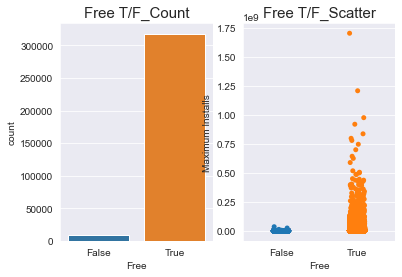

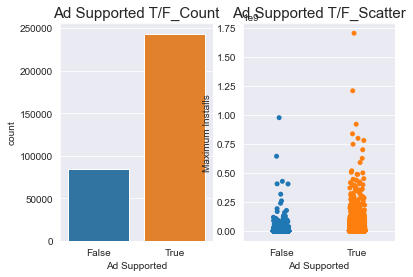

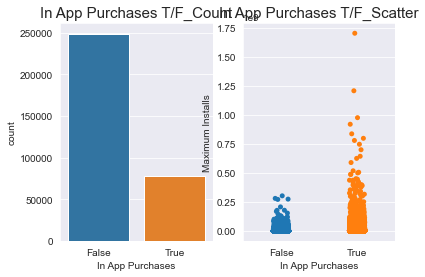

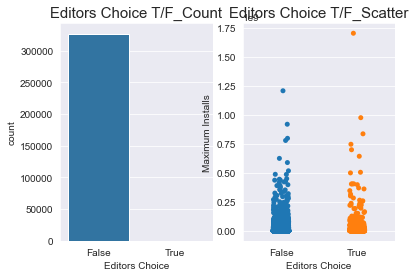

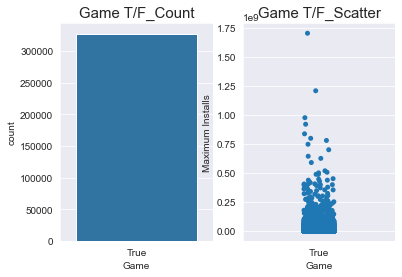

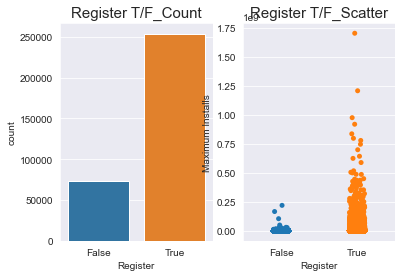

In [51]:
def f_bool(df1, df2):
    for col, x in zip(df1, df2):
        if x=='bool':
            plt.subplot(1,2,1)
            sns.countplot(x=col, data=data1, dodge=False)
            plt.title(str(col)+' T/F_Count',  fontdict = {'fontsize' : 15})
            plt.subplot(1,2,2)
            sns.stripplot(x=col, y='Maximum Installs', data=data1)
            plt.title(str(col)+' T/F_Scatter', fontdict = {'fontsize' : 15})
            plt.show()
        else:
            pass
f_bool(data1.dtypes.index, data1.dtypes)

In [ ]:
sns.countplot(x='R', data=tmp, dodge=False)

In [ ]:
def f_bool(df1, df2):
    for col, x in zip(df1, df2):
        if x=='bool':
            plt.subplot(1,2,1)
            sns.countplot(x=data1[col], hue=data1['Released Month'],dodge=False)
            plt.title(str(col)+' T/F_Count', fontdict = {'fontsize' : 15})
            plt.subplot(1,2,2)
            sns.stripplot(x=col, y='Maximum Installs', hue='Released Month', data=data1)
            plt.title(str(col)+' T/F_Scatter', fontdict = {'fontsize' : 15})
            plt.show()
        else:
            pass

f_bool(data1.dtypes.index, data1.dtypes)

### Price, Size, Minimum Android, Content Rating
- Price 연속형 데이터 다른 변수와의 관계를 살펴 보았으나 유의미한 관계를 보기 어렵다??
- Size

#### Price

C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Maximum Installs'>

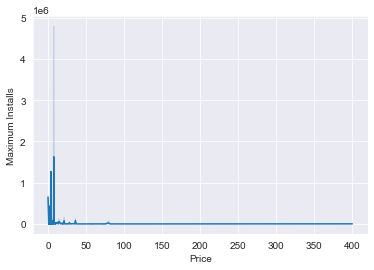

In [52]:
sns.lineplot('Price', 'Maximum Installs', data=data1)

C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Released Year', ylabel='Price'>

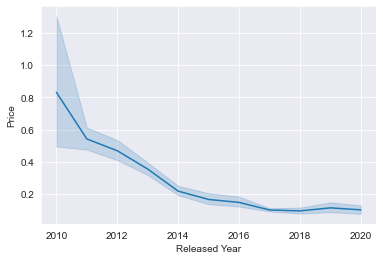

In [53]:
sns.lineplot( 'Released Year','Price', data=data1)

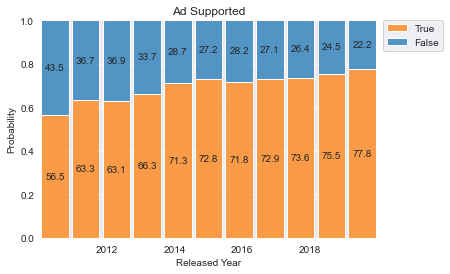

In [74]:
##앱가격이 낮아지고 있음을 확인-->시간이 지날수록 광고포함이 증가했는지 확인
ax=sns.histplot(x='Released Year', data=data1, bins=11,
             hue='Ad Supported',shrink=0.9,
             multiple='fill', stat='probability')
plt.legend(['True', 'False'],bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Ad Supported')

for p in ax.patches:
    left, bottom, width, height=p.get_bbox().bounds
    ax.annotate("%.1f"%(height*100), xy=(left+width/2, bottom+height/2),
                ha='center', va='center')

C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Updated Year', ylabel='Price'>

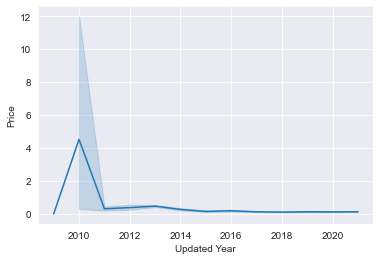

In [54]:
sns.lineplot( 'Updated Year','Price', data=data1)

In [ ]:
data1.corr()['Price'] #상관관계가 있는 데이터가 있다고 보기 힘들다.

#### Size

In [117]:
data1['Size'].str[-1].unique()

array(['M', 'e', 'k', 'G'], dtype=object)

In [119]:
data1['Size'].str[-1].value_counts()

M    311094
e     13536
k      2809
G         6
Name: Size, dtype: int64

In [118]:
# 단위로 그룹화하기

data1['Size Group']=data1['Size'].str[-1]
data1['Size Group']

0          M
9          M
21         M
24         M
25         M
          ..
2241818    M
2241823    M
2241840    k
2241845    M
2241855    M
Name: Size Group, Length: 327445, dtype: object

C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size Group', ylabel='count'>

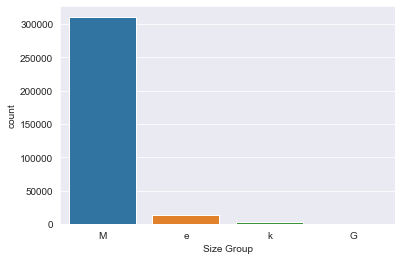

In [120]:
sns.countplot(data1['Size Group'])

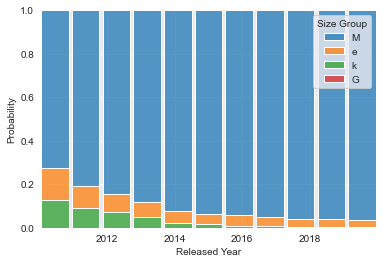

In [121]:
ax=sns.histplot(x='Released Year', data=data1, bins=11,
             hue='Size Group',shrink=0.9,
             multiple='fill', stat='probability', legend='Content Rating')

# for p in ax.patches:
#     left, bottom, width, height=p.get_bbox().bounds
#     ax.annotate("%.1f"%(height*100), xy=(left+width/2, bottom+height/2),
#                 ha='center', va='center')

In [ ]:
data1['Size']

In [ ]:
data1['Size']

In [ ]:
tmp=data1.copy()
tmp['Released Year']=tmp['Released Year'].astype(str)
sns.lineplot(x='Released Month', y='Maximum Installs', hue='Released Year', data=tmp)

### Content Rating

In [78]:
data1['Content Rating'].value_counts()

Everyone           268226
Teen                38917
Everyone 10+        14202
Mature 17+           6030
Unrated                45
Adults only 18+        25
Name: Content Rating, dtype: int64

C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Content Rating', ylabel='count'>

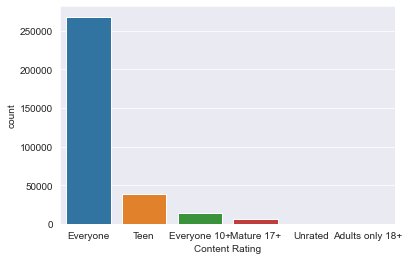

In [80]:
sns.countplot(data1['Content Rating'])

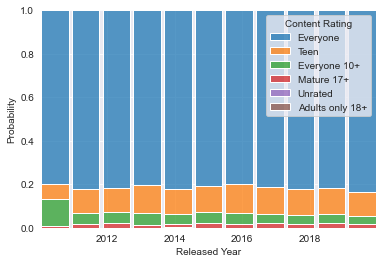

In [88]:
ax=sns.histplot(x='Released Year', data=data1, bins=11,
             hue='Content Rating',shrink=0.9,
             multiple='fill', stat='probability', legend='Content Rating')

# for p in ax.patches:
#     left, bottom, width, height=p.get_bbox().bounds
#     ax.annotate("%.1f"%(height*100), xy=(left+width/2, bottom+height/2),
#                 ha='center', va='center')

### Minimum Android

In [90]:
data1['Minimum Android'].value_counts()

4.1 and up            101981
4.4 and up             61178
5.0 and up             36684
2.3 and up             27863
4.0 and up             23162
4.0.3 and up           17992
4.2 and up              9369
6.0 and up              6489
5.1 and up              6460
4.3 and up              5894
Varies with device      4576
2.3.3 and up            4520
2.2 and up              4184
3.0 and up              4138
7.0 and up              2975
2.1 and up              1919
8.0 and up              1831
4.4W and up             1374
1.6 and up              1205
3.2 and up               576
7.1 and up               496
2.0 and up               481
1.5 and up               285
2.0.1 and up             255
3.1 and up               245
1.0 and up                36
4.0 - 6.0                 19
1.1 and up                14
4.0.3 - 6.0                3
4.1 - 8.0                  3
2.3 - 5.0                  2
2.3.3 - 4.4                2
4.4 - 6.0                  2
2.1 - 5.0                  2
2.2 - 6.0     

C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Minimum Android', ylabel='count'>

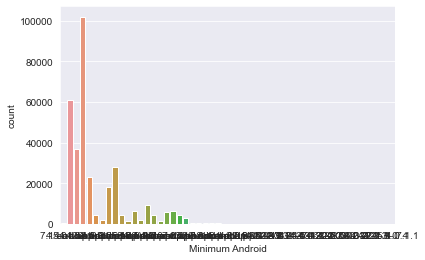

In [92]:
sns.countplot(data1['Minimum Android'])